# **BASIC MODEL AFTER TWEAKING**

IMPORT THE REQUIRED LIBRARIES

In [3]:
import tensorflow as tf
import numpy as np
import pandas as pd

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

GET THE DATASET

In [2]:
!wget --no-check-certificate \
    https://drive.google.com/uc?id=13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P \
    -O /tmp/sentiment.csv

--2023-03-07 13:28:38--  https://drive.google.com/uc?id=13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P
Resolving drive.google.com (drive.google.com)... 74.125.204.113, 74.125.204.139, 74.125.204.102, ...
Connecting to drive.google.com (drive.google.com)|74.125.204.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-08-ak-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/0vflrmccllns3b9msrjt9aafug3q9sdd/1678195650000/11118900490791463723/*/13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P?uuid=1fd97f4a-069f-4df3-9e47-faceaf18aa6c [following]
--2023-03-07 13:28:38--  https://doc-08-ak-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/0vflrmccllns3b9msrjt9aafug3q9sdd/1678195650000/11118900490791463723/*/13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P?uuid=1fd97f4a-069f-4df3-9e47-faceaf18aa6c
Resolving doc-08-ak-docs.googleusercontent.com (doc-08-ak-docs.googleusercontent.com)... 108.177.97.132, 2404:6800:4008:c00::84
Connecting to doc-08

LOAD THE DATASET

In [4]:
dataset = pd.read_csv('/tmp/sentiment.csv')

sentences = dataset['text'].tolist()
labels = dataset['sentiment'].tolist()

# Separate out the sentences and labels into training and test sets
training_size = int(len(sentences) * 0.8)

training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

# Make labels into numpy arrays for use with the network later
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

TOKENIZE THE DATASET

Previously we used the Parameters.

      vocab_size = 1000
      embedding_dim = 16
      max_length = 100
      trunc_type='post'
      padding_type='post'









In [5]:
vocab_size = 500
embedding_dim = 16
max_length = 50
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

DEVELOP THE MODEL

In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),  ## used the GlobalAveragePooling1D() layer
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 16)            8000      
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 6)                 102       
                                                                 
 dense_1 (Dense)             (None, 1)                 7         
                                                                 
Total params: 8,109
Trainable params: 8,109
Non-trainable params: 0
_________________________________________________________________


TRAIN THE MODEL

In [7]:
num_epochs = 100
history = model.fit(training_padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Epoch 1/100
50/50 [==============================] - 3s 11ms/step - loss: 0.6916 - accuracy: 0.5223 - val_loss: 0.6994 - val_accuracy: 0.4110
Epoch 2/100
50/50 [==============================] - 0s 6ms/step - loss: 0.6897 - accuracy: 0.5235 - val_loss: 0.6975 - val_accuracy: 0.4135
Epoch 3/100
50/50 [==============================] - 0s 5ms/step - loss: 0.6861 - accuracy: 0.5298 - val_loss: 0.6976 - val_accuracy: 0.4311
Epoch 4/100
50/50 [==============================] - 0s 5ms/step - loss: 0.6802 - accuracy: 0.5518 - val_loss: 0.6927 - val_accuracy: 0.4612
Epoch 5/100
50/50 [==============================] - 0s 5ms/step - loss: 0.6714 - accuracy: 0.5920 - val_loss: 0.6812 - val_accuracy: 0.5338
Epoch 6/100
50/50 [==============================] - 0s 6ms/step - loss: 0.6592 - accuracy: 0.6529 - val_loss: 0.6792 - val_accuracy: 0.5188
Epoch 7/100
50/50 [==============================] - 0s 5ms/step - loss: 0.6421 - accuracy: 0.6667 - val_loss: 0.6566 - val_accuracy: 0.6190
Epoch 8/100


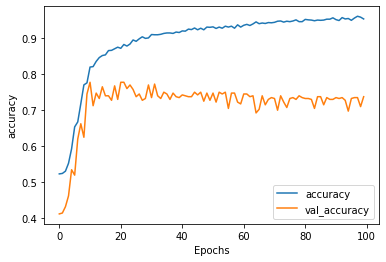

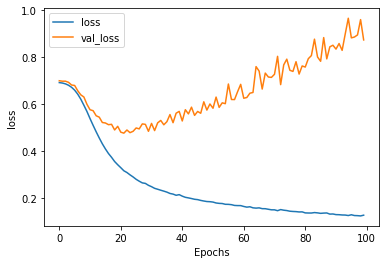

In [8]:
## visualize the training graph
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

GET FILES FOR VISUALIZING THE NETWORK

In [9]:
# First get the weights of the embedding layer
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(500, 16)


In [10]:
import io

# Create the reverse word index
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# Write out the embedding vectors and metadata
out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [11]:
# Download the files
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

PREDICTION OF SENTIMENTS USING MODEL

In [12]:
# Use the model to predict a review   
fake_reviews = ['I love this phone', 'I hate spaghetti', 
                'Everything was cold',
                'Everything was hot exactly as I wanted', 
                'Everything was green', 
                'the host seated us immediately',
                'they gave us free chocolate cake', 
                'not sure about the wilted flowers on the table',
                'only works when I stand on tippy toes', 
                'does not work when I stand on my head']

print(fake_reviews) 

# Create the sequences
padding_type='post'
sample_sequences = tokenizer.texts_to_sequences(fake_reviews)
fakes_padded = pad_sequences(sample_sequences, padding=padding_type, maxlen=max_length)           

print('\nHOT OFF THE PRESS! HERE ARE SOME NEWLY MINTED, ABSOLUTELY GENUINE REVIEWS!\n')              

classes = model.predict(fakes_padded)

# The closer the class is to 1, the more positive the review is deemed to be
for x in range(len(fake_reviews)):
  print(fake_reviews[x])
  print(classes[x])
  print('\n')


['I love this phone', 'I hate spaghetti', 'Everything was cold', 'Everything was hot exactly as I wanted', 'Everything was green', 'the host seated us immediately', 'they gave us free chocolate cake', 'not sure about the wilted flowers on the table', 'only works when I stand on tippy toes', 'does not work when I stand on my head']

HOT OFF THE PRESS! HERE ARE SOME NEWLY MINTED, ABSOLUTELY GENUINE REVIEWS!

1/1 [==============================] - 1s 687ms/step
I love this phone
[0.99921817]


I hate spaghetti
[0.00690118]


Everything was cold
[0.64587796]


Everything was hot exactly as I wanted
[0.2875314]


Everything was green
[0.64587796]


the host seated us immediately
[0.94967806]


they gave us free chocolate cake
[0.99956226]


not sure about the wilted flowers on the table
[0.0051156]


only works when I stand on tippy toes
[0.9980793]


does not work when I stand on my head
[0.00429131]




***